In [645]:
import pandas as pd

In [647]:
df = pd.read_csv(r"C:\Users\Julius\Desktop\Training and Interns\Uptrail intern\Week 1 project\customer_signups.csv")

In [649]:
# Exploring the shape of the data before cleansing
row_count = df.shape[0]
column_count = df.shape[1]
print ('Number of rows: ', row_count)
print ('Number of columns: ',column_count)

Number of rows:  300
Number of columns:  10


In [651]:
# Checking the data types before cleansing
df.dtypes        # at this point all columns are being read as 'object' probably because the data needs cleaning to make it uniform down a column.

customer_id         object
name                object
email               object
signup_date         object
source              object
region              object
plan_selected       object
marketing_opt_in    object
age                 object
gender              object
dtype: object

In [653]:
df.isnull().sum()      

customer_id          2
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64

In [655]:
# Count missing values for each column, grouped by region
missing_counts = df.groupby('region').apply(lambda group: group.isna().sum())

print("Missing values by region:")
print(missing_counts)

Missing values by region:
         customer_id  name  email  signup_date  source  region  plan_selected  \
region                                                                          
Central            0     0      5            0       0       0              0   
East               0     2      7            0       0       0              2   
North              0     3     10            0       4       0              3   
South              1     1      4            0       2       0              0   
West               1     3      4            1       1       0              2   

         marketing_opt_in  age  gender  
region                                  
Central                 2    2       1  
East                    3    2       3  
North                   2    3       0  
South                   2    2       1  
West                    1    2       3  


C:\Users\Julius\AppData\Local\Temp\ipykernel_4100\1884140619.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_counts = df.groupby('region').apply(lambda group: group.isna().sum())


In [659]:
# Total missing values across all columns per region
total_missing_by_region = df.groupby('region').apply(lambda group: group.isna().sum().sum())


print(total_missing_by_region)

region
Central    10
East       19
North      25
South      13
West       18
dtype: int64


C:\Users\Julius\AppData\Local\Temp\ipykernel_4100\3874258816.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_missing_by_region = df.groupby('region').apply(lambda group: group.isna().sum().sum())


In [663]:
# a) customer_id: 2 missing values
        # I am going to look for the missing values by matching them to which row they appear in the data frame.
        # To ensure that they are consistent i will first sort the data frame and then look them up

df_sorted = df.sort_values(by='customer_id', ascending=True)
df_sorted[df_sorted['customer_id'].isna()]

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
161,NaN,Robert Carter,robert61@example.com,10-06-24,LinkedIn,South,Pro,Yes,34,Male
287,NaN,Antonio Hammond,antonio87@inboxmail.net,14-10-24,Instagram,West,prem,Yes,25,FEMALE


In [665]:
needed_ids = ['CUST00161', 'CUST00287']
existing_rows = df[df['customer_id'].isin(needed_ids)]
print(existing_rows)

    # The output shows that there are no such customer Ids therefore il will update the records and assign CUST00161 and CUST00287 to Robert Carter and Antonio Hammond respectively
    # To ensure i dont miss any other person with similar Robert Carter or Antonio Hammond, Il only update if customer_id is missing

Empty DataFrame
Columns: [customer_id, name, email, signup_date, source, region, plan_selected, marketing_opt_in, age, gender]
Index: []


In [667]:
df.loc[
    (df['name'] == 'Robert Carter') & (df['customer_id'].isna()),
    'customer_id'
] = 'CUST00161'

df.loc[
    (df['name'] == 'Antonio Hammond') & (df['customer_id'].isna()),
    'customer_id'
] = 'CUST00287'

In [669]:
# b) name: 9 missing values
# c) email: 34 missing values

df[df['name'].isna()]  
df[df['email'].isna()] 

    # It is impractical to assign names or emails from just the available data 
    # Even if we assumed from emails, some people dont use their names in emails and vise versa
    # For that reason, I will first leave name and email as it is and see wether I will need them for this analysis
    # I dont believe I need to drop them as they have other important data points for this analysis
    # The most feasible way to get some of this data would be to contact the persons directly 

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
9,CUST00009,Cindy Anderson,NaN,10-01-24,Google,East,PREMIUM,No,29,FEMALE
18,CUST00018,Tara Harmon,NaN,19-01-24,LinkedIn,Central,Basic,Yes,34,FEMALE
27,CUST00027,Adam Hampton,NaN,28-01-24,Instagram,North,PREMIUM,No,25,FEMALE
36,CUST00036,NaN,NaN,06-02-24,Google,North,PREMIUM,Yes,29,Non-Binary
45,CUST00045,Tyler Ortiz,NaN,15-02-24,LinkedIn,West,PRO,No,25,Male
54,CUST00054,Tanner Davis,NaN,24-02-24,Referral,East,PREMIUM,No,25,NaN
63,CUST00063,Tamara Cox,NaN,04-03-24,Referral,Central,Pro,No,21,male
72,CUST00072,Megan Drake,NaN,13-03-24,Facebook,Central,Pro,NaN,25,Non-Binary
81,CUST00081,Joanne Wade,NaN,22-03-24,Google,East,Premium,No,40,Other


In [671]:
# d) signup_date : 2 missing values
df[df['signup_date'].isna()] 

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
80,CUST00080,Charles Wright,charles80@inboxmail.net,NaN,YouTube,West,PREMIUM,Yes,21,Female


In [673]:
# Sort data frame

df = df.sort_values(by='customer_id', ascending=True)

In [675]:
# check to see if there are any invalid entries
df['signup_date'].value_counts()

signup_date
not a date    4
02-01-24      1
17-07-24      1
23-07-24      1
22-07-24      1
             ..
09-04-24      1
08-04-24      1
07-04-24      1
06-04-24      1
26-10-24      1
Name: count, Length: 295, dtype: int64

In [677]:
# Convert signup_date to datetime format, using coerce to convert all invalid entries to missing values

df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce') 

C:\Users\Julius\AppData\Local\Temp\ipykernel_4100\3293741544.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')


In [679]:
df[df['signup_date'].isna()]  # We can see that the 4 invalid entries (not a date) are now cast as missing entries.
                                # Now total count of missing values is 6

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,NaN,basic,No,34,Female
80,CUST00080,Charles Wright,charles80@inboxmail.net,NaT,YouTube,West,PREMIUM,Yes,21,Female
120,CUST00120,Rachel Gray,rachel20@mailhub.org,NaT,Referral,Central,basic,Yes,47,Non-Binary
159,CUST00159,Jeremy Taylor,jeremy59@example.com,NaT,Facebook,South,Basic,Yes,21,Female
197,CUST00197,NaN,jessica97@mailhub.org,NaT,YouTube,North,Premium,Yes,34,male
217,CUST00217,Dylan Wallace,dylan17@example.com,NaT,LinkedIn,South,Basic,Yes,40,Female


In [681]:
# Define target customer IDs
target_ids = ['CUST00000', 'CUST00080', 'CUST00120', 'CUST00159', 'CUST00197', 'CUST00217']

# Filter only the relevant rows
row = df['customer_id'].isin(target_ids)

# Apply backward fill only to signup_date column for those rows
df.loc[row, 'signup_date'] = df.loc[row, 'signup_date'].bfill()

In [683]:
df.isnull().sum() # The missing values have not been updated so i will do it manualy

customer_id          0
name                 9
email               34
signup_date          6
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64

In [685]:
target_ids2 = ['CUST00000', 'CUST00001','CUST00080', 'CUST00081', 'CUST00120', 'CUST00121','CUST00159', 'CUST00160', 'CUST00197', 'CUST00198', 'CUST00217', 'CUST00218']
rows2 = df['customer_id'].isin(target_ids2)
print(df[rows2])  # I can see that signup_dates are not neccesarily in ascenting order as customer id, probably it explains why backfilling didnt work
                    # I will manualy fill these missing dates with the mode

    customer_id               name                        email signup_date  \
0     CUST00000      Joshua Bryant                          NaN         NaT   
1     CUST00001     Nicole Stewart          nicole1@example.com  2024-02-01   
80    CUST00080     Charles Wright      charles80@inboxmail.net         NaT   
81    CUST00081        Joanne Wade                          NaN  2024-03-22   
120   CUST00120        Rachel Gray         rachel20@mailhub.org         NaT   
121   CUST00121     Carolyn Castro        carolyn21@mailhub.org  2024-01-05   
159   CUST00159      Jeremy Taylor         jeremy59@example.com         NaT   
160   CUST00160  Christopher Brown  christopher60@inboxmail.net  2024-09-06   
197   CUST00197                NaN        jessica97@mailhub.org         NaT   
198   CUST00198   Kimberly Jackson                          NaN  2024-07-17   
217   CUST00217      Dylan Wallace          dylan17@example.com         NaT   
218   CUST00218        Jared Smith          jared18@

In [687]:
# Find the mode (most frequent date)
mode_date = df['signup_date'].mode()[0]

# Count how often it appears
count = (df['signup_date'] == mode_date).sum()

# Display the result
print(f"The most common signup_date is: {mode_date.date()} (appears {count} times)")


The most common signup_date is: 2024-02-02 (appears 2 times)


In [689]:
df['signup_date'] = df['signup_date'].fillna(pd.Timestamp('2024-02-02'))

In [691]:
df.isnull().sum()

customer_id          0
name                 9
email               34
signup_date          0
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64

In [693]:
# e) source: 9 missing values
df[df['source'].isna()]  # For this case i will use the mode to fill the missing values

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
24,CUST00024,Mitchell Kerr,mitchell24@mailhub.org,2024-01-25,NaN,North,PRO,No,21,Female
51,CUST00051,Bradley Solomon,bradley51@example.com,2024-02-21,NaN,NaN,Premium,No,25,Male
91,CUST00091,Melissa White,melissa91@example.com,2024-01-04,NaN,West,Pro,Yes,40,male
215,CUST00215,Amanda Whitaker,amanda15@mailhub.org,2024-03-08,NaN,South,PRO,No,40,Male
223,CUST00223,Jeffrey Cunningham,jeffrey23@example.com,2024-11-08,NaN,NaN,Basic,Yes,25,Non-Binary
229,CUST00229,Kevin Colon,kevin29@example.com,2024-08-17,NaN,North,UnknownPlan,No,29,Female
235,CUST00235,Gloria King,gloria35@mailhub.org,2024-08-23,NaN,North,NaN,Yes,25,Non-Binary
284,CUST00284,Chad Nguyen,chad84@inboxmail.net,2024-11-10,NaN,South,PREMIUM,Yes,53,Other
299,CUST00299,Mr. Bruce Bridges,mr.99@example.com,2024-10-26,NaN,North,Premium,Yes,29,Male


In [695]:
df.groupby('gender')['source'].value_counts()  # since i have their names and gender, I will use mode by gender and not overall mode

gender      source   
123         Referral      4
            Google        1
            Instagram     1
FEMALE      Referral     14
            Instagram    10
            LinkedIn     10
            YouTube       8
            Google        6
            Facebook      4
Female      Facebook     11
            Google        9
            YouTube       9
            Instagram     4
            LinkedIn      4
            Referral      2
Male        Instagram    12
            LinkedIn     10
            Google        8
            YouTube       6
            Referral      4
            Facebook      1
Non-Binary  Google        9
            Facebook      8
            Referral      8
            YouTube       8
            ??            3
            LinkedIn      3
            Instagram     1
Other       Instagram    12
            YouTube      12
            Facebook     10
            Google        9
            LinkedIn      7
            Referral      6
            ??            

In [697]:
# Gender needs to be cleaned first so it can be used for grouping

In [698]:
df['gender'].value_counts()

gender
Other         59
FEMALE        52
male          48
Male          44
Non-Binary    42
Female        41
123            6
Name: count, dtype: int64

In [701]:
# Correcting the formats entered so far
df['gender'] = df['gender'].replace({'male':'Male', 'FEMALE':'Female'})

In [703]:
# Adressing entries were gender was entered as 123
gender_123 = df[df['gender'] == '123']
gender_missing = df[df['gender'].isna()]
print(gender_123)
print(gender_missing)

    customer_id                 name                  email signup_date  \
87    CUST00087           Tony Evans   tony87@inboxmail.net  2024-03-28   
101   CUST00101      Angelica Arroyo  angelica1@mailhub.org  2024-11-04   
147   CUST00147  Dr. Danielle Snyder      dr.47@mailhub.org  2024-05-27   
164   CUST00164      Julie Schneider    julie64@mailhub.org  2024-06-13   
204   CUST00204      Patricia Powers  patricia4@mailhub.org  2024-07-23   
227   CUST00227        Katie Collins    katie27@example.com  2024-08-15   

        source region plan_selected marketing_opt_in  age gender  
87   Instagram   East           PRO               No   29    123  
101     Google   East       Premium              Yes   21    123  
147   Referral  South           Pro              Yes   53    123  
164   Referral   West       Premium              Yes   40    123  
204   Referral  North         basic               No  206    123  
227   Referral  South         basic               No  NaN    123  
    c

In [705]:
 # I will use the universal knowledge of male vs female names to assign appropriate genders to all these
target_male = ['CUST00087', 'CUST00054', 'CUST00090', 'CUST00100', 'CUST00129', 'CUST00214', 'CUST00295', 'CUST00297']
target_female = ['CUST00101', 'CUST00147', 'CUST00164', 'CUST00204', 'CUST00227', 'CUST00136']

df.loc[df['customer_id'].isin(target_male), 'gender'] = 'Male'
df.loc[df['customer_id'].isin(target_female), 'gender'] = 'Female'

In [707]:
df['gender'].value_counts()  # now gender is clean

gender
Male          100
Female         99
Other          59
Non-Binary     42
Name: count, dtype: int64

In [709]:
df[df['source'].isna()]  # now that all genders have been asigned, i will use mode of source per group (gender)

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
24,CUST00024,Mitchell Kerr,mitchell24@mailhub.org,2024-01-25,NaN,North,PRO,No,21,Female
51,CUST00051,Bradley Solomon,bradley51@example.com,2024-02-21,NaN,NaN,Premium,No,25,Male
91,CUST00091,Melissa White,melissa91@example.com,2024-01-04,NaN,West,Pro,Yes,40,Male
215,CUST00215,Amanda Whitaker,amanda15@mailhub.org,2024-03-08,NaN,South,PRO,No,40,Male
223,CUST00223,Jeffrey Cunningham,jeffrey23@example.com,2024-11-08,NaN,NaN,Basic,Yes,25,Non-Binary
229,CUST00229,Kevin Colon,kevin29@example.com,2024-08-17,NaN,North,UnknownPlan,No,29,Female
235,CUST00235,Gloria King,gloria35@mailhub.org,2024-08-23,NaN,North,NaN,Yes,25,Non-Binary
284,CUST00284,Chad Nguyen,chad84@inboxmail.net,2024-11-10,NaN,South,PREMIUM,Yes,53,Other
299,CUST00299,Mr. Bruce Bridges,mr.99@example.com,2024-10-26,NaN,North,Premium,Yes,29,Male


In [711]:
df['source'] = df['source'].fillna(
    df.groupby('gender')['source'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

In [713]:
df.isnull().sum()

customer_id          0
name                 9
email               34
signup_date          0
source               0
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               0
dtype: int64

In [715]:
# g) Region: 30 missing values
# h) Plan_selcted: 8 missing values
# i) marketing_opt_in: 10 missing values

  # For all these three variables, i will use the mode to fill the missing values as well but grouped by gender to minimise the error

In [717]:
df['region'].value_counts()

region
North      65
East       61
South      59
West       46
Central    39
Name: count, dtype: int64

In [719]:
df[df['region'].isna()] 

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,2024-02-02,Instagram,NaN,basic,No,34,Female
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,YouTube,NaN,Pro,No,40,Male
37,CUST00037,Thomas Ruiz,thomas37@inboxmail.net,2024-07-02,Facebook,NaN,Premium,Yes,NaN,Female
41,CUST00041,Christopher Zuniga,christopher41@mailhub.org,2024-11-02,Google,NaN,PREMIUM,Yes,29,Female
48,CUST00048,Angel Chavez,angel48@example.com,2024-02-18,YouTube,NaN,basic,No,25,Non-Binary
51,CUST00051,Bradley Solomon,bradley51@example.com,2024-02-21,Instagram,NaN,Premium,No,25,Male
58,CUST00058,James Martin,james58@mailhub.org,2024-02-28,Referral,NaN,Premium,Yes,21,Other
59,CUST00059,Michael Lee,michael59@inboxmail.net,2024-02-29,YouTube,NaN,basic,Yes,25,Female
62,CUST00062,Michael Alvarez,michael62@example.com,2024-03-03,Google,NaN,PRO,Yes,47,Non-Binary
65,CUST00065,Richard Hudson,richard65@mailhub.org,2024-06-03,Referral,NaN,Premium,No,60,Female


In [721]:
    # replacing missing regions with modal region grouped by gender
df['region'] = df['region'].fillna(
    df.groupby('gender')['region'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

In [723]:
df['plan_selected'].value_counts()

plan_selected
Premium        57
Pro            53
basic          46
Basic          46
PREMIUM        42
PRO            41
UnknownPlan     6
prem            1
Name: count, dtype: int64

In [725]:
# Correcting the formats entered so far on plan_selected
df['plan_selected'] = df['plan_selected'].replace({'PRO':'Pro', 'basic':'Basic', 'PREMIUM':'Premium', 'prem':'Premium'})

In [727]:
df['plan_selected'].value_counts()

plan_selected
Premium        100
Pro             94
Basic           92
UnknownPlan      6
Name: count, dtype: int64

In [729]:
   # replacing missing plans with modal plans grouped by gender
df['plan_selected'] = df['plan_selected'].fillna(
    df.groupby('gender')['plan_selected'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

In [731]:
df['marketing_opt_in'].value_counts()

marketing_opt_in
No     156
Yes    133
Nil      1
Name: count, dtype: int64

In [733]:
# Correcting the formats entered so far on marketing_opt_in
df['marketing_opt_in'] = df['marketing_opt_in'].replace({'Nil':'No'})

In [735]:
# replacing missing marketing_opt_in with modal marketing_opt_in grouped by gender
df['marketing_opt_in'] = df['marketing_opt_in'].fillna(
    df.groupby('gender')['marketing_opt_in'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

In [737]:
df.isnull().sum()

customer_id          0
name                 9
email               34
signup_date          0
source               0
region               0
plan_selected        0
marketing_opt_in     0
age                 12
gender               0
dtype: int64

In [739]:
# j) age: 12 missing values

In [741]:
# removing invalid entries in age
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [743]:
df.isnull().sum()   # after correcting removing invalid ages it is now 19 missing values (ie 7 invalid entries converted to missing values)

customer_id          0
name                 9
email               34
signup_date          0
source               0
region               0
plan_selected        0
marketing_opt_in     0
age                 19
gender               0
dtype: int64

In [745]:
df[df['age'].isna()]

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
21,CUST00021,Suzanne Jones,suzanne21@mailhub.org,2024-01-22,Instagram,Central,Basic,No,NaN,Female
23,CUST00023,Dawn Cook,dawn23@example.com,2024-01-24,Instagram,Central,Basic,Yes,NaN,Other
33,CUST00033,Jodi Curry,jodi33mailhub.org,2024-03-02,YouTube,East,Basic,Yes,NaN,Male
37,CUST00037,Thomas Ruiz,thomas37@inboxmail.net,2024-07-02,Facebook,North,Premium,Yes,NaN,Female
40,CUST00040,Mary Phillips,mary40@mailhub.org,2024-10-02,Instagram,East,Premium,No,NaN,Male
53,CUST00053,Rebecca Lopez,rebecca53@inboxmail.net,2024-02-23,Referral,North,Pro,Yes,NaN,Female
56,CUST00056,Brian Hardy,brian56@mailhub.org,2024-02-26,Referral,East,Pro,Yes,NaN,Female
76,CUST00076,Dalton Herrera,dalton76@example.com,2024-03-17,Instagram,East,Basic,No,NaN,Other
88,CUST00088,Paula Bruce,paula88@inboxmail.net,2024-03-29,Google,North,Basic,Yes,NaN,Male
108,CUST00108,Allison Hoffman,NaN,2024-04-18,LinkedIn,North,Basic,No,NaN,Male


In [747]:
# replacing missing values of age 

agesummary = df.groupby('gender')['age'].agg(
    mean = 'mean',
    std = 'std',
    median = 'median',
    min = 'min',
    max = 'max'
)
print (agesummary)  # there is an impractical value of 206 on age, I will replace this with the median

                 mean        std  median   min    max
gender                                               
Female      37.787234  21.017592    34.0  21.0  206.0
Male        34.340659  10.333570    34.0  21.0   60.0
Non-Binary  35.487805  10.881457    34.0  21.0   60.0
Other       36.763636  11.275939    34.0  21.0   60.0


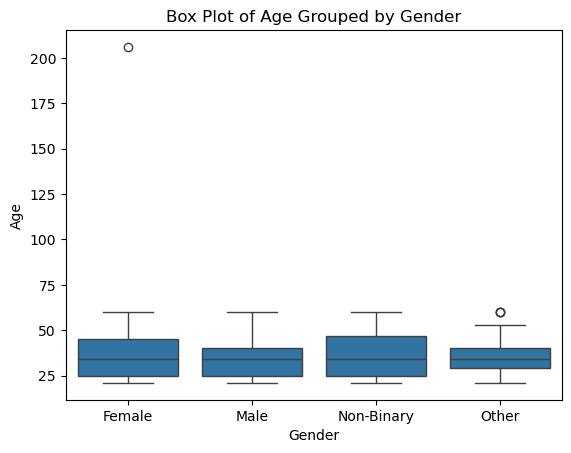

In [749]:
# Visual representation of age
import seaborn as sns
import matplotlib.pyplot as plt

# Draw box plot for 'age grouped by gender'
sns.boxplot(x='gender', y='age', data=df)
plt.title("Box Plot of Age Grouped by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

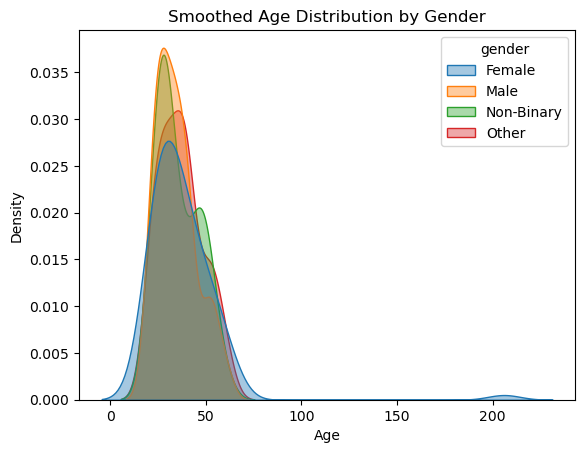

In [750]:
# Plot smooth density curves of age grouped by gender

sns.kdeplot(data=df, x='age', hue='gender', fill=True, common_norm=False, alpha=0.4)
plt.title("Smoothed Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

In [752]:
# from the box plot and the density curves, we can see that age is not normaly distributed in each of the different groups of gender
# Therefore all the missing values on age shall be replaced with the median age which is 34

import numpy as np

# Replace NaN and 206 with 34
df['age'] = df['age'].replace(206, 34)
df['age'] = df['age'].fillna(34)

In [755]:
df.isnull().sum()

customer_id          0
name                 9
email               34
signup_date          0
source               0
region               0
plan_selected        0
marketing_opt_in     0
age                  0
gender               0
dtype: int64

In [761]:
df['source'].value_counts()  # There are 6 entries which are invalid (captured as ??), I will replace them with the modal source grouped by gender 

source
YouTube      58
Instagram    54
Google       52
Referral     51
Facebook     40
LinkedIn     39
??            6
Name: count, dtype: int64

In [763]:
# Replacing '??' with NaN so they are treated as missing values
df['source'] = df['source'].replace('??', np.nan)

# Fill NaN with gender-specific mode
df['source'] = df['source'].fillna(
    df.groupby('gender')['source'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

In [765]:
df['region'].value_counts()

region
North      88
East       68
South      59
West       46
Central    39
Name: count, dtype: int64

In [767]:
df['plan_selected'].value_counts()

plan_selected
Premium        100
Basic           97
Pro             97
UnknownPlan      6
Name: count, dtype: int64

In [769]:
df['marketing_opt_in'].value_counts()

marketing_opt_in
No     167
Yes    133
Name: count, dtype: int64

In [771]:
df['gender'].value_counts()

gender
Male          100
Female         99
Other          59
Non-Binary     42
Name: count, dtype: int64

In [773]:
duplicate_ids = df[df.duplicated(subset='customer_id', keep=False)]
print(duplicate_ids)    # There are no duplicates

Empty DataFrame
Columns: [customer_id, name, email, signup_date, source, region, plan_selected, marketing_opt_in, age, gender]
Index: []


In [859]:
# weekly signsups grouped by signup date (NB: I already made signup_date a dateformat

# Group by week (week ending Sunday) and count the rows which represent sign ups
weekly_customers = df.set_index('signup_date').resample('W').size()

# Calculate mean and median
mean_signups = weekly_customers.mean()
median_signups = weekly_customers.median()
q1= weekly_customers.quantile(0.25)
q3= weekly_customers.quantile(0.75)

print(f"Mean weekly signups: {mean_signups}")
print(f"Median weekly signups: {median_signups}")
print([q1, q3])
print(weekly_customers)


Mean weekly signups: 6.0
Median weekly signups: 7.0
[5.0, 7.0]
signup_date
2024-01-07     6
2024-01-14     5
2024-01-21     7
2024-01-28     7
2024-02-04    14
2024-02-11     6
2024-02-18     6
2024-02-25     7
2024-03-03     7
2024-03-10     7
2024-03-17     5
2024-03-24     6
2024-03-31     6
2024-04-07     7
2024-04-14     5
2024-04-21     7
2024-04-28     7
2024-05-05     6
2024-05-12     4
2024-05-19     7
2024-05-26     7
2024-06-02     7
2024-06-09     7
2024-06-16     5
2024-06-23     7
2024-06-30     7
2024-07-07     7
2024-07-14     5
2024-07-21     6
2024-07-28     7
2024-08-04     7
2024-08-11     5
2024-08-18     6
2024-08-25     7
2024-09-01     7
2024-09-08     7
2024-09-15     5
2024-09-22     7
2024-09-29     7
2024-10-06     7
2024-10-13     5
2024-10-20     7
2024-10-27     6
2024-11-03     3
2024-11-10     7
2024-11-17     0
2024-11-24     0
2024-12-01     1
2024-12-08     7
2024-12-15     2
Freq: W-SUN, dtype: int64


In [775]:
# a) sign_ups by source
source_signsups = df['source'].value_counts()
source_signsups_percent = df['source'].value_counts(normalize = True)*100
print ('Percent signup by source', round(source_signsups_percent, 1))
print('Counts of signups by source', source_signsups)

Percent signup by source source
YouTube      19.3
Instagram    19.0
Google       18.3
Referral     17.0
Facebook     13.3
LinkedIn     13.0
Name: proportion, dtype: float64
Counts of signups by source source
YouTube      58
Instagram    57
Google       55
Referral     51
Facebook     40
LinkedIn     39
Name: count, dtype: int64


In [777]:
# b) sign_ups by region
region_signsups = df['region'].value_counts()
region_signsups_percent = df['region'].value_counts(normalize = True)*100
print ('Percent signup by region', round(region_signsups_percent, 1))
print('Counts of signups by region', region_signsups)

Percent signup by region region
North      29.3
East       22.7
South      19.7
West       15.3
Central    13.0
Name: proportion, dtype: float64
Counts of signups by region region
North      88
East       68
South      59
West       46
Central    39
Name: count, dtype: int64


In [779]:
# c) sign_ups by plan_selected
plan_selected_signsups = df['plan_selected'].value_counts()
plan_selected_signsups_percent = df['plan_selected'].value_counts(normalize = True)*100
print ('Percent signup by plan_selected', round(plan_selected_signsups_percent, 1))
print('Counts of signups by plan_selected', plan_selected_signsups)

Percent signup by plan_selected plan_selected
Premium        33.3
Basic          32.3
Pro            32.3
UnknownPlan     2.0
Name: proportion, dtype: float64
Counts of signups by plan_selected plan_selected
Premium        100
Basic           97
Pro             97
UnknownPlan      6
Name: count, dtype: int64


In [781]:
# d) market_opt ins by gender
marketing_opts_count = df['marketing_opt_in'].value_counts()
marketing_opts_percent =round(df['marketing_opt_in'].value_counts(normalize=True)*100, 1)
print(marketing_opts_count)
print(marketing_opts_percent)

marketing_opt_in
No     167
Yes    133
Name: count, dtype: int64
marketing_opt_in
No     55.7
Yes    44.3
Name: proportion, dtype: float64


In [783]:
marketing_opts_count2 = df.groupby('gender')['marketing_opt_in'].value_counts()
marketing_opts_percent2 = round(df.groupby('gender')['marketing_opt_in'].value_counts(normalize=True)*100, 1)
print(marketing_opts_count2)
print(marketing_opts_percent2)

gender      marketing_opt_in
Female      No                  50
            Yes                 49
Male        No                  59
            Yes                 41
Non-Binary  No                  23
            Yes                 19
Other       No                  35
            Yes                 24
Name: count, dtype: int64
gender      marketing_opt_in
Female      No                  50.5
            Yes                 49.5
Male        No                  59.0
            Yes                 41.0
Non-Binary  No                  54.8
            Yes                 45.2
Other       No                  59.3
            Yes                 40.7
Name: proportion, dtype: float64


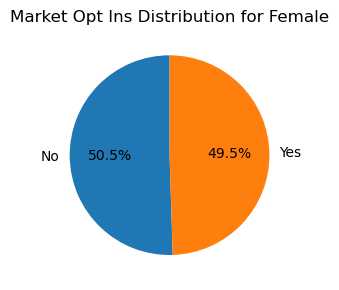

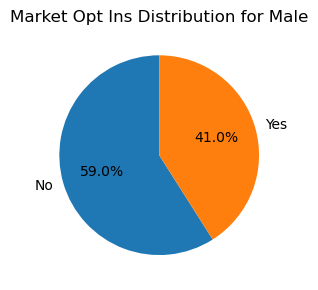

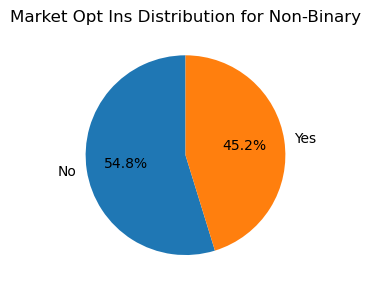

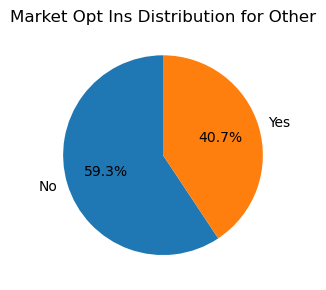

In [785]:
# visualisation
# Group data
grouped = df.groupby(['gender', 'marketing_opt_in']).size().unstack(fill_value=0)

# Plot a pie chart for each gender
for gender in grouped.index:
    plt.figure(figsize=(3, 3))
    grouped.loc[gender].plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Market Opt Ins Distribution for {gender}')
    plt.ylabel('')  # Hide y-label for pie
    plt.tight_layout()
    plt.show()

In [787]:
marketing_opts_count3 = df.groupby('marketing_opt_in')['gender'].value_counts()
marketing_opts_percent3 = round(df.groupby('marketing_opt_in')['gender'].value_counts(normalize=True)*100, 1)
print(marketing_opts_count3)
print(marketing_opts_percent3)

marketing_opt_in  gender    
No                Male          59
                  Female        50
                  Other         35
                  Non-Binary    23
Yes               Female        49
                  Male          41
                  Other         24
                  Non-Binary    19
Name: count, dtype: int64
marketing_opt_in  gender    
No                Male          35.3
                  Female        29.9
                  Other         21.0
                  Non-Binary    13.8
Yes               Female        36.8
                  Male          30.8
                  Other         18.0
                  Non-Binary    14.3
Name: proportion, dtype: float64


In [789]:
# d) age summary statistics

age_summary = df['age'].agg(
    mean = 'mean',
    median = 'median'
)

print(round(age_summary, 1))

mean      35.4
median    34.0
Name: age, dtype: float64


In [791]:
max_age = df['age'].min()
min_age = df['age'].max()
print ([max_age, min_age])

[21.0, 60.0]


In [793]:
# e) signsups per week

weekly_counts = df.set_index('signup_date').resample('W').size()

print(weekly_counts)

signup_date
2024-01-07     6
2024-01-14     5
2024-01-21     7
2024-01-28     7
2024-02-04    14
2024-02-11     6
2024-02-18     6
2024-02-25     7
2024-03-03     7
2024-03-10     7
2024-03-17     5
2024-03-24     6
2024-03-31     6
2024-04-07     7
2024-04-14     5
2024-04-21     7
2024-04-28     7
2024-05-05     6
2024-05-12     4
2024-05-19     7
2024-05-26     7
2024-06-02     7
2024-06-09     7
2024-06-16     5
2024-06-23     7
2024-06-30     7
2024-07-07     7
2024-07-14     5
2024-07-21     6
2024-07-28     7
2024-08-04     7
2024-08-11     5
2024-08-18     6
2024-08-25     7
2024-09-01     7
2024-09-08     7
2024-09-15     5
2024-09-22     7
2024-09-29     7
2024-10-06     7
2024-10-13     5
2024-10-20     7
2024-10-27     6
2024-11-03     3
2024-11-10     7
2024-11-17     0
2024-11-24     0
2024-12-01     1
2024-12-08     7
2024-12-15     2
Freq: W-SUN, dtype: int64


In [795]:
# checking to see which years and months are available in the data set
latest_date = df['signup_date'].max()
latest_year = latest_date.year
latest_month = latest_date.month

# Display the result
print(latest_year, latest_month)   # we can see that the latest month was December (12) in 2024, therefore i will just look for sales in 2024-12

2024 12


In [797]:
# counting customers acquired from different sources in december of 2024

# Extracting all into 'YYYY-MM' format
df['year_month'] = df['signup_date'].dt.to_period('M').astype(str)

# Filter for December 2024
filtered = df[df['year_month'] == '2024-12']

# Count of each source
Dec_Total_sales = len(filtered)
source_counts = filtered['source'].value_counts()
source_counts_percent = round(filtered['source'].value_counts(normalize=True)*100, 1)

print('Total December 2024 sales:', Dec_Total_sales)
print('customer counts from each source for December 2024:', source_counts)
print ('Percentage from each source:', source_counts_percent)

Total December 2024 sales: 10
customer counts from each source for December 2024: source
Instagram    4
Referral     2
YouTube      2
Facebook     1
LinkedIn     1
Name: count, dtype: int64
Percentage from each source: source
Instagram    40.0
Referral     20.0
YouTube      20.0
Facebook     10.0
LinkedIn     10.0
Name: proportion, dtype: float64


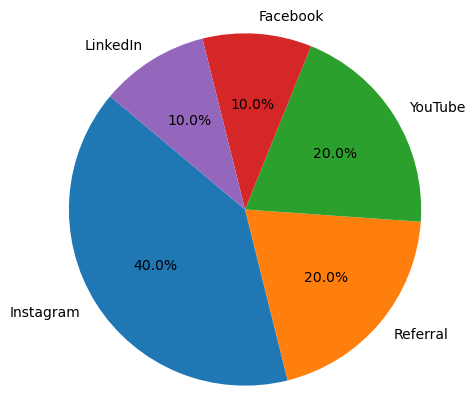

In [799]:
# pie chart for customer sources in Dec 2024
# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('')
plt.axis('equal')  # Ensures the pie is circular
plt.show()

In [805]:
# Are older users more or less likely to opt in to marketing? 

import scipy.stats as stats

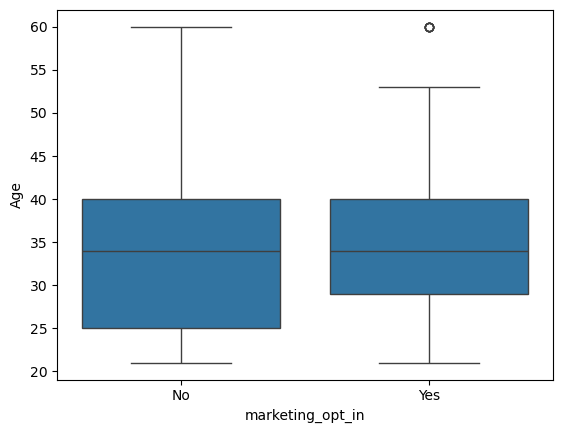

In [821]:
# Draw box plot for 'age grouped by marketing_opt_in'
sns.boxplot(x='marketing_opt_in', y='age', data=df)
plt.title('')
plt.xlabel("marketing_opt_in")
plt.ylabel("Age")
plt.show()

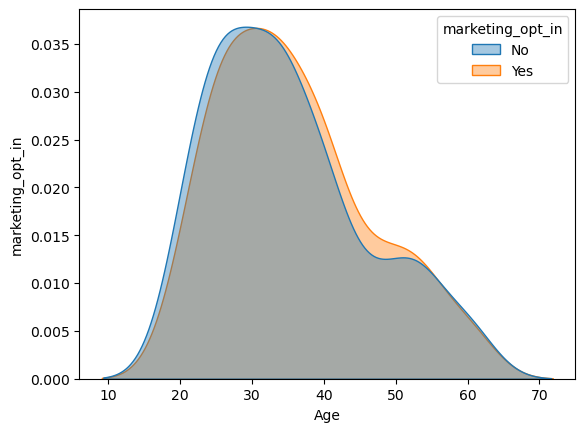

In [823]:
# Plot smooth density curves of age grouped by marketing_opt_in

sns.kdeplot(data=df, x='age', hue='marketing_opt_in', fill=True, common_norm=False, alpha=0.4)
plt.title('')
plt.xlabel("Age")
plt.ylabel("marketing_opt_in")
plt.show()

In [825]:
# from the box plots plotted earlier and the density curves for normal distribution, we saw that age is not normally distributed
# Therefore the best test for this relationship is a mannwhitney U test

from scipy.stats import mannwhitneyu

#Split age into two groups based on marketing_opt_in 

group1 = df[df['marketing_opt_in'] == df['marketing_opt_in'].unique()[0]]['age'] 
group2 = df[df['marketing_opt_in'] == df['marketing_opt_in'].unique()[1]]['age'] 

# Perform Mann-Whitney U test 
u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided') 

 
print(f"Mann-Whitney U test: U-statistic = {u_stat:.3f}, p-value = {p_value:.3f}")

Mann-Whitney U test: U-statistic = 10529.000, p-value = 0.435


C:\Users\Julius\AppData\Local\Temp\ipykernel_4100\2887031481.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketting_in_customers['age_group'] = pd.cut(marketting_in_customers['age'], bins=age_group, labels=age_label, right=False)


age_group
20-29    52
30-39    28
40-49    35
50-59    12
60-69     6
dtype: int64


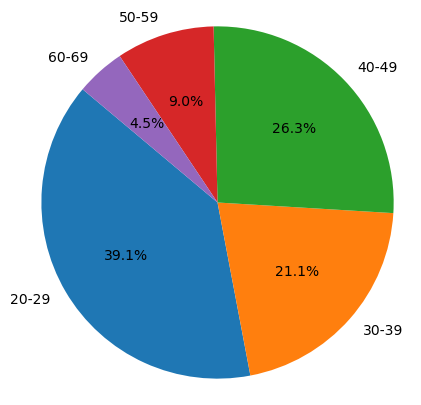

In [907]:
#Descriptive
# Filter for users who opted for marketing material
marketting_in_customers = df[df['marketing_opt_in'] == 'Yes']

# Define age categorises with width 10

age_group = range(0, int(df['age'].max()) + 11, 10) 

# Adjust to include max age 

age_label = [f'{i}-{i+9}' for i in range(0, int(df['age'].max()) + 1, 10)] 

# Create age group column 

marketting_in_customers['age_group'] = pd.cut(marketting_in_customers['age'], bins=age_group, labels=age_label, right=False) 

# Count premium_users by age group 

marketting_in_customers_counts = marketting_in_customers.groupby('age_group', observed=True).size() 

# Display the result 
print(marketting_in_customers_counts) 

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(marketting_in_customers_counts, labels=marketting_in_customers_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('')
plt.axis('equal')  
plt.show()

In [827]:
df['plan_selected'].value_counts()

plan_selected
Premium        100
Basic           97
Pro             97
UnknownPlan      6
Name: count, dtype: int64

age_group
20-29    38
30-39    20
40-49    32
50-59     6
60-69     4
dtype: int64


C:\Users\Julius\AppData\Local\Temp\ipykernel_4100\1580567629.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium_users['age_group'] = pd.cut(premium_users['age'], bins=age_bins, labels=age_labels, right=False)


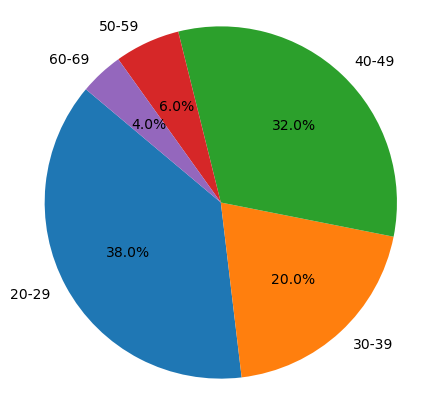

In [847]:
# Premium as the most users with 100 so i will only analyse that, I will create age groups of width 10

# Filter for premium users 
premium_users = df[df['plan_selected'] == 'Premium'] 

# Define age categorises with width 10

age_bins = range(0, int(df['age'].max()) + 11, 10) 

# Adjust to include max age 

age_labels = [f'{i}-{i+9}' for i in range(0, int(df['age'].max()) + 1, 10)] 

# Create age group column 

premium_users['age_group'] = pd.cut(premium_users['age'], bins=age_bins, labels=age_labels, right=False) 

# Count premium_users by age group 

premium_users_counts = premium_users.groupby('age_group', observed=True).size() 

# Display the result 
print(premium_users_counts) 

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(premium_users_counts, labels=premium_users_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('')
plt.axis('equal')  # Ensures the pie is circular
plt.show()

In [851]:
df.dtypes

customer_id                 object
name                        object
email                       object
signup_date         datetime64[ns]
source                      object
region                      object
plan_selected               object
marketing_opt_in            object
age                        float64
gender                      object
year_month                  object
dtype: object

In [871]:
df_support = pd.read_csv(r'C:\Users\Julius\Desktop\Training and Interns\Uptrail intern\Week 1 project\support_tickets.csv')

In [879]:
row_count2 = df_support.shape[0]
column_count2 = df_support.shape[1]
print ('Number of rows in support dateset:' ,row_count2)
print ('Number of coulmns in support dateset:', column_count2)  # only 123 sign-ups contacted support

Number of rows in support dateset: 123
Number of coulmns in support dateset: 5


In [883]:
# Joining the data sets,
# An inner join is appropriate so that i only see customers who are both in the sign_up and support data sets
joined_data = pd.merge(df, df_support, on='customer_id', how='inner')

In [885]:
row_count3 = joined_data.shape[0]
column_count3 = joined_data.shape[1]
print ('Number of rows in merged dateset:' ,row_count3)
print ('Number of coulmns in merged dateset:', column_count3)

Number of rows in merged dateset: 123
Number of coulmns in merged dateset: 15


In [893]:
# Which plan’s users are most likely to contact support? 

count_plan = joined_data['plan_selected'].value_counts()
count_plan_percent = round(joined_data['plan_selected'].value_counts(normalize=True)*100, 1)
print (count_plan)
print (count_plan_percent)

plan_selected
Pro            51
Basic          42
Premium        26
UnknownPlan     4
Name: count, dtype: int64
plan_selected
Pro            41.5
Basic          34.1
Premium        21.1
UnknownPlan     3.3
Name: proportion, dtype: float64


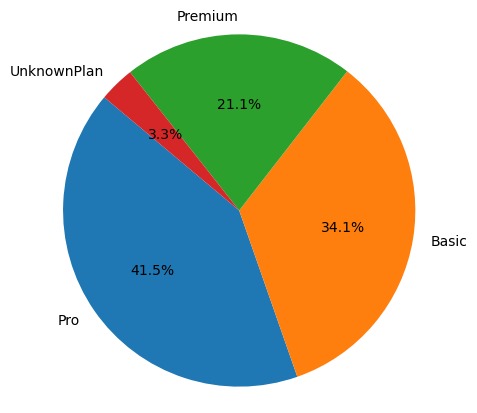

In [895]:
# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(count_plan, labels=count_plan.index, autopct='%1.1f%%', startangle=140)
plt.title('')
plt.axis('equal')  # Ensures the pie is circular
plt.show()

In [897]:
# support contacts by region
count_region = joined_data['region'].value_counts()
count_region_percent = round(joined_data['region'].value_counts(normalize=True)*100, 1)
print (count_region)
print (count_region_percent)

region
East       33
West       27
North      26
South      19
Central    18
Name: count, dtype: int64
region
East       26.8
West       22.0
North      21.1
South      15.4
Central    14.6
Name: proportion, dtype: float64


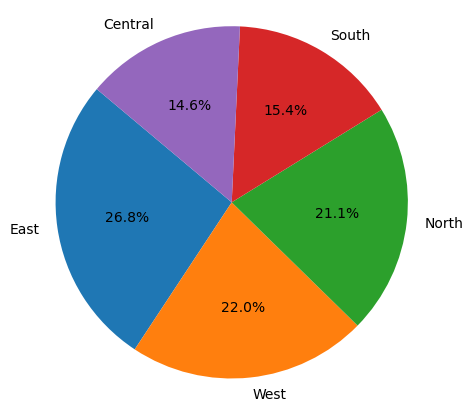

In [899]:
# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(count_region, labels=count_region.index, autopct='%1.1f%%', startangle=140)
plt.title('')
plt.axis('equal')  # Ensures the pie is circular
plt.show()